In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model

import cv2

In [2]:
tf.random.set_seed(44)

In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
train_dataset = image_dataset_from_directory(directory = "all/",
                                             labels = "inferred",
                                             label_mode = "categorical",
                                             color_mode = "grayscale",
                                             batch_size = 30,
                                             image_size = (28, 28),
                                             shuffle = True,
                                             seed = 44,
                                             validation_split = 0.2,
                                             subset = "training")

valid_dataset = image_dataset_from_directory(directory = "all/",
                                             labels = "inferred",
                                             label_mode = "categorical",
                                             color_mode = "grayscale",
                                             batch_size = 30,
                                             image_size = (28, 28),
                                             shuffle = True,
                                             seed = 44,
                                             validation_split = 0.2,
                                             subset = "validation")

Found 49619 files belonging to 24 classes.
Using 39696 files for training.
Found 49619 files belonging to 24 classes.
Using 9923 files for validation.


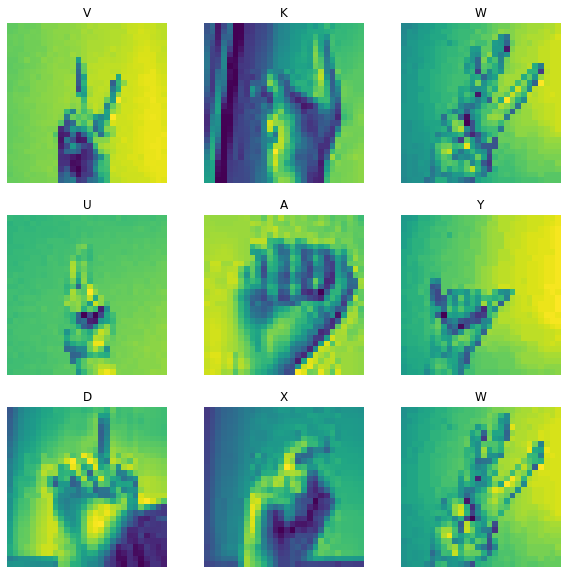

In [5]:
plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(np.array(list("ABCDEFGHIKLMNOPQRSTUVWXY"))[np.argmax(labels[i])])
        plt.axis("off")

In [6]:
train_dataset = train_dataset.prefetch(buffer_size=32)
valid_dataset = valid_dataset.prefetch(buffer_size=32)

In [7]:
log_dir = "logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [9]:
model = keras.models.Sequential([
    
#     keras.layers.RandomBrightness(factor=0.25),
#     keras.layers.RandomContrast(factor=0.25),
#     keras.layers.RandomFlip(),
#     keras.layers.RandomZoom(height_factor=0.2),
    
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape = [28, 28, 1]),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Conv2D(512, 2, activation="relu", padding="same"),
    keras.layers.Conv2D(512, 2, activation="relu", padding="same"),
    keras.layers.MaxPool2D(2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(24, activation="softmax")])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

In [11]:
history = model.fit(train_dataset,
                    epochs=120,
                    validation_data=valid_dataset,
                    callbacks=[tensorboard_callback])

In [ ]:
tf.keras.models.save_model(model, "best_model")